In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Checking to see if gpu is connected correctly
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14818149505182915980
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3141979340
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1032192470647457328
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


input_dim = 28 * 28 # pixel length and width of each image
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # normalize by dividing by maximum pixel value
x_test /= 255

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [18]:
shape_of_first = x_train[0].shape

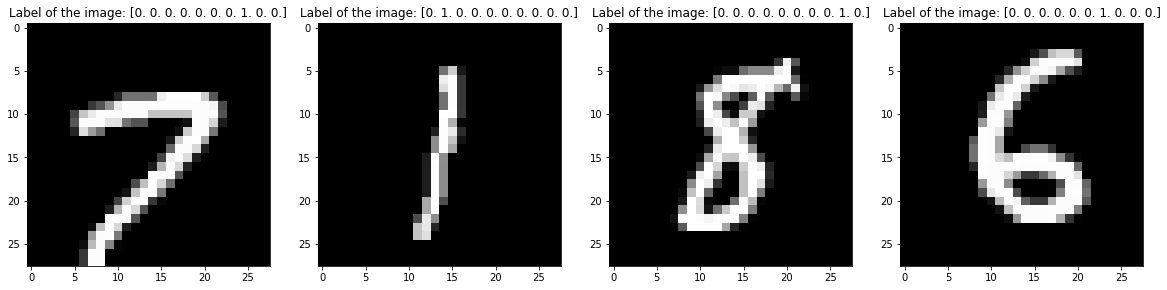

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(x_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(x_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(x_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(x_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

In [19]:
model = Sequential()
model.add(Dense(1028, input_shape=shape_of_first, activation="relu"))
model.add(Dense(1028, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1028)              806980    
_________________________________________________________________
dense_9 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimzer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(x_test, y_test))

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Executing op VarHandleOp in 

### In this task, you'll build an ANN and train and test it using the MNIST data. This ANN should consist of two hidden and one output layer. All hidden layers should be dense. The neuron sizes of the first layer and the second layer should be 32 and 16 respectively. Train this model 20 epochs and compare your train and test set performance with the example above Is there any difference? If so, why?

In [21]:
new_model = Sequential()
model.add(Dense(1028, input_shape=shape_of_first, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [23]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(x_test, y_test))

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_initialize_variables_70193 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _

Comparing this model to the previous, it appears as though having more nodes available in the hidden layers performed better overall to having significantly less nodes but more hidden layers.

### You'll also build an ANN in this task. This time, this ANN should have 5 hidden layers and 1 output layer. All the layers should be dense. The neuron numbers for the hidden layers should be 1024, 512, 256, 128 and 64. Train this model 20 epochs and test it using the same data from the previous task and compare your results. Is there any difference? If so, why?

In [25]:
model = Sequential()
model.add(Dense(1028, input_shape=shape_of_first, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(x_test, y_test))

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /jo

This model is the best suited of the three models and combines the better qualities of the previous two to optimize the accuracy while reducing overfitting of the training data. It uses both a sufficient number of nodes to find patterns within discreet pixel clusters, and sufficient layers to find associations between those patterns.